<a href="https://colab.research.google.com/github/daisy-rivera/Sales-Predictions/blob/main/Project1_Part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project 1- Part 3


Daisy Rivera

The goal of this project is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales.

Link to original datasource [Here](https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/)

###Data Dictionary

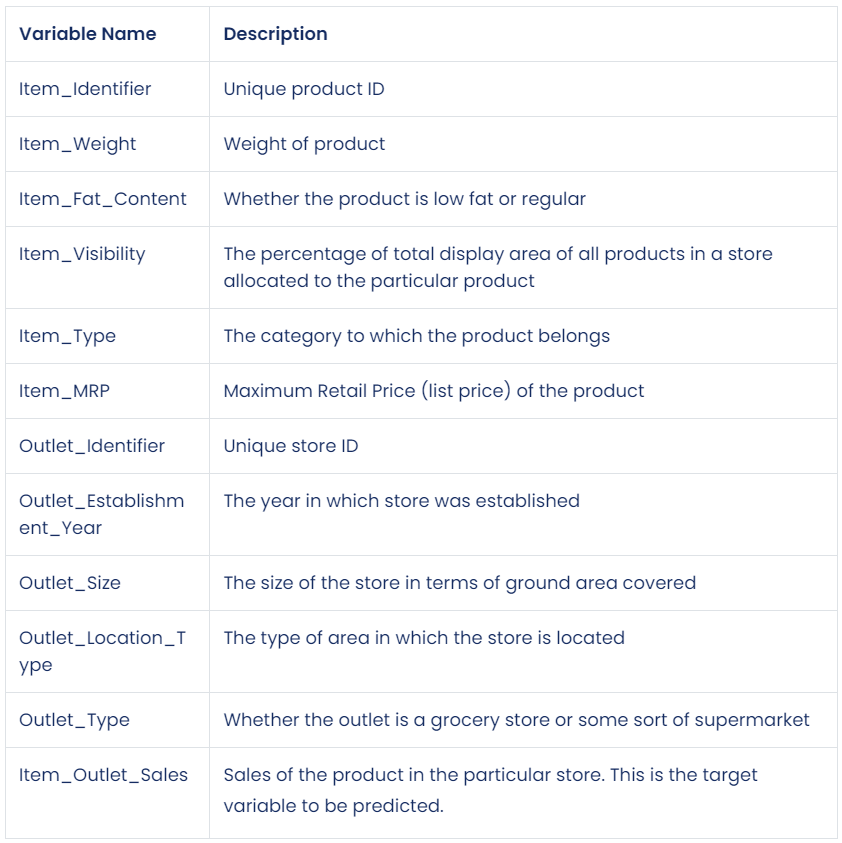

##Loading Data



In [2]:
import pandas as pd
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
filename = '/content/drive/MyDrive/Coding Dojo/02 Week 2: Pandas/sales_predictions.csv'
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Data Cleaning



In [6]:
#Total Number of rows and columns

df.shape

(8523, 12)

There are a total of 8523 Rows and 12 Columns.

In [7]:
#The datatypes of each variable

df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [8]:
#Checking for duplicate items

df.duplicated().sum()

0

There are no duplicated values in this dataset.

In [9]:
#Identifying missing values

df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
#Verifying what percentage of the data is missing.
df.isna().sum() / len(df) * 100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

Based on the large amount of data missing I have decided to use the average weight to fill in the missing values for Item_Weight. To address the missing Outlet_Size fields, I will add a new category called "Unknown".

In [11]:
#Filling in Missing Item_Weight fields with the average weight.

mean_itemweight = df['Item_Weight'].mean().round(2)

df['Item_Weight'].fillna(value = mean_itemweight, inplace = True)


In [12]:
#Adding the new category "Unknown" to Outlet_Size

df['Outlet_Size'].fillna(value = 'Unknown', inplace = True)

In [13]:
#Checking to see if the blank fields were replaced.
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

All missing values have been addressed.

In [14]:
#Checking for inconsistent categories of data

df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [15]:
#Renaming all categories for consistency to Low Fat & Regular.
df.replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'}, inplace = True)

In [16]:
#Verifying that the categories were changed.
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [17]:
#Checking for inconsistent categories of data

df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [18]:
#Checking for inconsistent categories of data

df['Outlet_Size'].value_counts()

Medium     2793
Unknown    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

In [19]:
#Checking for inconsistent categories of data

df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [20]:
#Checking for inconsistent categories of data

df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [21]:
#Summary statistics for the integer values.

df.describe().round(4)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.0000,8523.0000,8523.0000,8523.0000,8523.0000
mean,12.8580,0.0661,140.9928,1997.8319,2181.2889
std,4.2261,0.0516,62.2751,8.3718,1706.4996
min,4.5550,0.0000,31.2900,1985.0000,33.2900
25%,9.3100,0.0270,93.8265,1987.0000,834.2474
50%,12.8600,0.0539,143.0128,1999.0000,1794.3310
75%,16.0000,0.0946,185.6437,2004.0000,3101.2964
max,21.3500,0.3284,266.8884,2009.0000,13086.9648


## Exploratory Visuals




In [22]:
#importing libraries

import matplotlib.pyplot as plt
import seaborn as sns

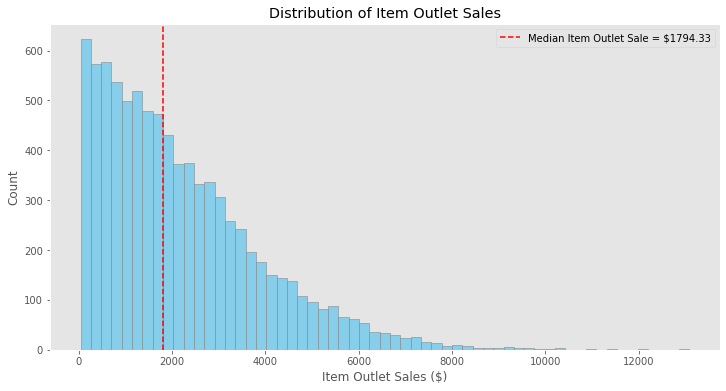

In [23]:
#creating a histogram showing distribution of item outlet sales
plt.style.use('ggplot')
ax = df['Item_Outlet_Sales'].hist(figsize = (12,6), bins = 'auto', grid = False, edgecolor = 'grey', color = "skyblue")

ax.set(xlabel = 'Item Outlet Sales ($)', ylabel = 'Count',
       title = 'Distribution of Item Outlet Sales')

median = df['Item_Outlet_Sales'].median().round(2)

ax.axvline(median, color = 'r', ls = '--',
            label=f'Median Item Outlet Sale = ${median}')
ax.legend();

From this image I can see that the first half of the distribution of sales are pretty consistent and comparable to one another. The second half of the distribution of sales has a larger range of distribution. 

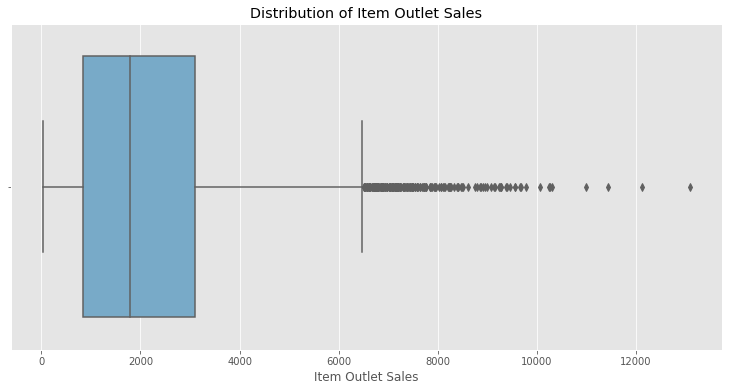

In [24]:
#Boxplot of Item_Outlet_Sales
plt.figure(figsize=(12.75,6))
sns.boxplot(data=df, x='Item_Outlet_Sales',palette="Blues");
plt.title('Distribution of Item Outlet Sales')
plt.xlabel('Item Outlet Sales')
plt.show()

Based on both the histogram and boxplot of the Item Outlet Sales we can see that there are several outliers within this data.

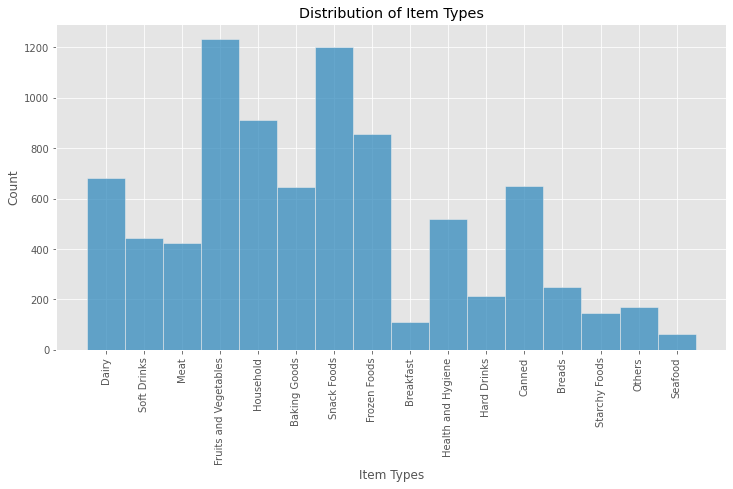

In [32]:
plt.figure(figsize=(12,6))
ax = sns.histplot(data=df,x='Item_Type');

ax.set(title='Distribution of Item Types', xlabel = 'Item Types');
plt.xticks(rotation= 90);

I can conclude taht the majority of Item types are Fruits & Vegetables and Snacks. I can also conclude that Seafood is the least of the Item types.

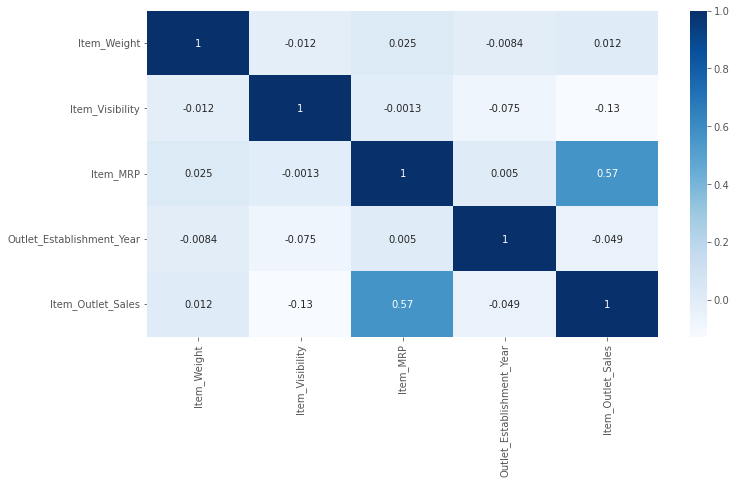

In [27]:
#creating a heat map
plt.figure(figsize=(11.45,6))
sns.heatmap(df.corr(),annot=True,cmap='Blues');

From the heat map I can determine that there is very little correlation between the data. The largest correlation is between the Item Outlet Sales and the Item Maximum Retail Price (MRP).

## Explanatory Visuals

